## Build your own Naive Bayes classifier. Perform a sentiment analysis, classifying whether feedback left on a website is either positive or negative. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn
import seaborn as sns

In [2]:
datapath = '../Datasets/yelp_labelled.txt'
feedback_raw = pd.read_csv(datapath, delimiter='\t', header=None)
feedback_raw.columns = ['message', 'feedback']

feature = pd.DataFrame()
sns.set_style('white')
feedback_raw.head(10)

,message,feedback
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [3]:
# does length of message determine feedback?
feature['message_length'] = feedback_raw['message'].str.len()
feature['feedback'] = feedback_raw['feedback']

i = 0
while i < 2:
    print('Negative Feedback') if i == 0 else print('Positive Feedback')
    print('count:', feature[feature['feedback']==i]['message_length'].count())
    print('min:', feature[feature['feedback']==i]['message_length'].min())
    print('max:', feature[feature['feedback']==i]['message_length'].max())
    print('mean:', feature[feature['feedback']==i]['message_length'].mean())
    print('median:', feature[feature['feedback']==i]['message_length'].median())
    print('10th percentile:', feature[feature['feedback']==i]['message_length'].quantile(.1))
    print('90th percentile:', feature[feature['feedback']==i]['message_length'].quantile(.9))    
    print('standard deviation:', feature[feature['feedback']==i]['message_length'].std())
    print(40 * '-')
    i = i + 1

scipy.stats.ttest_ind(feature[feature['feedback']==0].message_length,
                 feature[feature['feedback']==1].message_length)

Negative Feedback
count: 500
min: 11
max: 149
mean: 60.75
median: 52.5
10th percentile: 20.0
90th percentile: 114.0
standard deviation: 34.224935243
----------------------------------------
Positive Feedback
count: 500
min: 11
max: 148
mean: 55.882
median: 49.5
10th percentile: 21.0
90th percentile: 100.10000000000002
standard deviation: 30.2283904165
----------------------------------------


Ttest_indResult(statistic=2.3838116739287263, pvalue=0.017320493438559056)

In [4]:
# add space to msg before and after stmt to get first and last words 
feature['msg'] = ' ' + feedback_raw.message.str.replace('[^A-Za-z0-9\']+', ' ') + ' '

In [5]:
#find words that show up more frequently in negative feedbacks to build negative dictionary
dictionary = pd.DataFrame()
dictionary['negative'] = pd.Series(' '.join(feature[feature['feedback']==0].msg).lower().split()).value_counts()
dictionary['positive'] = pd.Series(' '.join(feature[feature['feedback']==1].msg).lower().split()).value_counts()
filtered_dictionary = np.where(dictionary['negative'] > dictionary['positive'], dictionary['negative'].index, None)
print(list(filter(lambda x: x != None, filtered_dictionary)))

['i', 'was', 'to', 'a', 'not', 'it', 'of', 'for', 'food', 'we', 'be', 'that', 'but', 'my', 'at', 'back', 'like', 'there', 'go', 'no', 'never', 'will', "don't", 'would', 'if', 'ever', 'up', 'again', 'from', 'only', 'your', 'one', 'much', 'got', 'did', 'out', "won't", 'disappointed', 'worst', 'what', 'been', 'think', 'being', 'going', 'me', "i've", 'came', 'us', 'more', 'eat', "i'm", 'which', 'better', 'or', 'get', 'wait', 'too', 'when', 'way', 'about', 'flavor', 'do', 'after', 'because', 'how', 'other', "didn't", 'than', 'another', 'over', 'them', 'ordered', 'times', 'burger', 'cold', 'quality', 'then', 'salad', 'coming', 'know', 'before', 'can', 'getting', 'sushi', 'down', '2', 'bit', 'impressed', 'give', 'any', 'feel', 'enough', 'off', 'meat', 'eating', 'people', 'she', 'soon', 'few', 'tasted', 'felt', 'around', 'said', 'meal', 'lunch', 'next', 'nothing', 'many', 'take', '1', 'sure', 'done', 'hour', 'hot', "can't", 'who', 'two', 'dishes', 'table', 'waiter', 'fries', 'warm', 'kept', 'c

In [6]:
#remove neutral/positive words from negative dictionary
neutral = ['was', 'for', 'that', 'there', 'your', 'from', 'what', 'like', "i've", "i'm", 'can', 'wife', 'dog', 'reviews', 'beans', 'green', "friend's", 'lobster', 'rice', 'fried']

In [7]:
#create negative dictionary excluding 2 letter words and neutral list
negative_dictionary = []
for word in filtered_dictionary:
    if (word != None):
        if ((len(word) > 2) & (word not in neutral)):
            negative_dictionary.append(word)
print(negative_dictionary)

['not', 'food', 'but', 'back', 'never', 'will', "don't", 'would', 'ever', 'again', 'only', 'one', 'much', 'got', 'did', 'out', "won't", 'disappointed', 'worst', 'been', 'think', 'being', 'going', 'came', 'more', 'eat', 'which', 'better', 'get', 'wait', 'too', 'when', 'way', 'about', 'flavor', 'after', 'because', 'how', 'other', "didn't", 'than', 'another', 'over', 'them', 'ordered', 'times', 'burger', 'cold', 'quality', 'then', 'salad', 'coming', 'know', 'before', 'getting', 'sushi', 'down', 'bit', 'impressed', 'give', 'any', 'feel', 'enough', 'off', 'meat', 'eating', 'people', 'she', 'soon', 'few', 'tasted', 'felt', 'around', 'said', 'meal', 'lunch', 'next', 'nothing', 'many', 'take', 'sure', 'done', 'hour', 'hot', "can't", 'who', 'two', 'dishes', 'table', 'waiter', 'fries', 'warm', 'kept', 'customer', 'bring', "i'll", 'enjoy', 'extremely', 'chips', 'servers', 'lot', 'old', 'found', 'see', 'return', 'talk', 'served', 'shrimp', 'needs', 'piece', 'least', 'possible', 'these', 'soup', 't

In [8]:
# keyword indicators of negative feedback

for key in negative_dictionary:
    # adding spaces around key to get word and not pattern matching.
    feature[str(key)] = feature.msg.str.contains(
        ' ' + str(key) + ' ', case=False
    )
feature.head(5)

,message_length,feedback,msg,not,food,but,back,never,will,don't,...,find,bill,honest,empty,meals,room,walked,checked,gone,ate
0,24,1,Wow Loved this place,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,18,0,Crust is not good,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,41,0,Not tasty and the texture was just nasty,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,87,1,Stopped by during the late May bank holiday o...,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,59,1,The selection on the menu was great and so we...,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


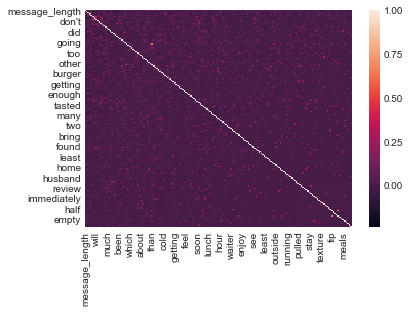

In [9]:
sns.set_style('white')
sns.heatmap(feature.corr())
plt.show()

In [10]:
data = feature[negative_dictionary]
target = feature['feedback']

# data is boolean, so import Bernoulli
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

#fit model to data
bnb.fit(data, target)

#classify, store results in variable
y_pred = bnb.predict(data)

#display
print("number of mislabeled points out of total {} points: {}".format(
    data.shape[0], (target != y_pred).sum()
))

number of mislabeled points out of total 1000 points: 293
